In [11]:
#Importing all the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
#Importing the "Franchises Dataset"
from google.colab import files
data= files.upload()

Saving Franchises Dataset.xlsx to Franchises Dataset.xlsx


In [3]:
#As the file has extension ".xlsx", I am using excel function for reading the file, using Pandas
df = pd.read_excel('Franchises Dataset.xlsx')
df

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type,Location
0,2.0,8.4,7.7,101,Café,Vancouver
1,1.3,3.3,4.5,59,Café,Vancouver
2,1.2,5.8,8.4,103,Pizza Store,Richmond
3,2.4,10.0,7.8,106,Burger store,Richmond
4,0.7,4.7,2.4,80,Café,Richmond
...,...,...,...,...,...,...
95,1.8,7.7,4.8,104,Burger store,Vancouver
96,0.6,4.5,2.5,80,Pizza Store,Vancouver
97,1.3,9.1,3.4,129,Pizza Store,Vancouver
98,1.0,5.9,2.2,85,Café,Vancouver


**Data Preprocessing**

In [4]:
#As evident, "Business Type" and "Location" columns are categorical, and DT and RF cannot handle alphanumeric data, so I have to encode them using OHE. Rest of the columns are numerical (no treatment needed).
#Performing one-hot encoding on 'Business Type' and 'Location' columns
df_encoded = pd.get_dummies(df[['Business Type', 'Location ']], dtype=int)
#Joining the encoded columns back to the original DataFrame and dropping the original columns
df = df.join(df_encoded).drop(['Business Type', 'Location '], axis=1)
# Displaying the resulting DataFrame
print("DataFrame after One-Hot Encoding:")
print(df.head())

DataFrame after One-Hot Encoding:
   Net Profit  Counter Sales  Drive-through Sales  number of customers  \
0         2.0            8.4                  7.7                  101   
1         1.3            3.3                  4.5                   59   
2         1.2            5.8                  8.4                  103   
3         2.4           10.0                  7.8                  106   
4         0.7            4.7                  2.4                   80   

   Business Type_Burger store  Business Type_Café  Business Type_Pizza Store  \
0                           0                   1                          0   
1                           0                   1                          0   
2                           0                   0                          1   
3                           1                   0                          0   
4                           0                   1                          0   

   Location _Richmond  Location _Vancouv

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Net Profit                  100 non-null    float64
 1   Counter Sales               100 non-null    float64
 2   Drive-through Sales         100 non-null    float64
 3   number of customers         100 non-null    int64  
 4   Business Type_Burger store  100 non-null    int64  
 5   Business Type_Café          100 non-null    int64  
 6   Business Type_Pizza Store   100 non-null    int64  
 7   Location _Richmond          100 non-null    int64  
 8   Location _Vancouver         100 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 7.2 KB


In [6]:
df.describe()

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type_Burger store,Business Type_Café,Business Type_Pizza Store,Location _Richmond,Location _Vancouver
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.451000,6.523000,4.762000,99.760000,0.390000,0.330000,0.280000,0.040000,0.960000
std,0.590068,2.014436,2.282865,26.183548,0.490207,0.472582,0.451261,0.196946,0.196946
min,0.200000,3.300000,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.075000,4.700000,2.500000,80.750000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.350000,6.100000,4.350000,101.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.825000,8.400000,7.700000,123.250000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.600000,10.000000,8.400000,143.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**(A) Decision Tree Model: Implementation and Accuracy Evaluation**

In [8]:
#Defining the Descriptive and Target Features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
#Splitting the Dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
#Implementing Decision Tree Model
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)
#Checking Training Accuracy for Preliminary Analysis
y_pred_train = dt_regressor.predict(X_train)
train_r2=r2_score(y_train, y_pred_train)
print("Training R-squared:", train_r2)
#Evaluating Testing Accuracy for Preliminary Analysis
y_pred = dt_regressor.predict(X_test)
test_r2=r2_score(y_test, y_pred)
print("Testing R-squared:", test_r2)

Training R-squared: 1.0
Testing R-squared: 0.9303841762127518


**Hyperparameter Tuning of Decision Tree Model**

In [18]:
#Having found overfitting issues in above model (having default values of hyperparameters), Using GridSearchCV for tuning of hyperparameters and finding best model
#Defining the grid of parameters to be tuned
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2', 0.5],
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}
rf = DecisionTreeRegressor()
#Initiating search/iterations using 10-fold cross validation, verbose=0 (no output during training), n_jobs=-1 (for faster parallel processing)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=0, scoring=['r2', 'neg_mean_squared_error'], refit='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
#Saving the best grid search results
best_grid = grid_search.best_estimator_
joblib.dump(best_grid, 'best_decision_tree_grid.pkl')
#Printing best parameters and best scores
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score found: ", grid_search.best_score_)
print("Best MSE score found: ", -grid_search.cv_results_['mean_test_neg_mean_squared_error'][grid_search.best_index_])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30720 fits failed out of a total of 61440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7837 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in

Best parameters found:  {'criterion': 'poisson', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best R-squared score found:  0.9013572807640333
Best MSE score found:  0.025704365079365084


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.36986233 0.29833519 0.3621664 ]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.17398397 -0.1927225
 -0.18261639]
  warnings.warn(


**Applying Best/tuned Decision Tree Model on Training and Testing Sets**

In [19]:
#Loading the best Decision Tree Model
best_model = joblib.load('best_decision_tree_grid.pkl')
#Predictions on training data
y_train_pred = best_model.predict(X_train)
#Evaluation of Accuracy of Best Model on Training Set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Training R-squared:", train_r2)
print("Training MSE:", train_mse)
#Predictions on test data
y_test_pred = best_model.predict(X_test)
#Evaluation of Accuracy of Best Model on Testing Set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing R-squared:", test_r2)
print("Testing MSE:", test_mse)

Training R-squared: 0.9874520099367661
Training MSE: 0.004535714285714286
Testing R-squared: 0.9528527754245092
Testing MSE: 0.014222222222222232


**(B) Visualization of Decision Tree Model**

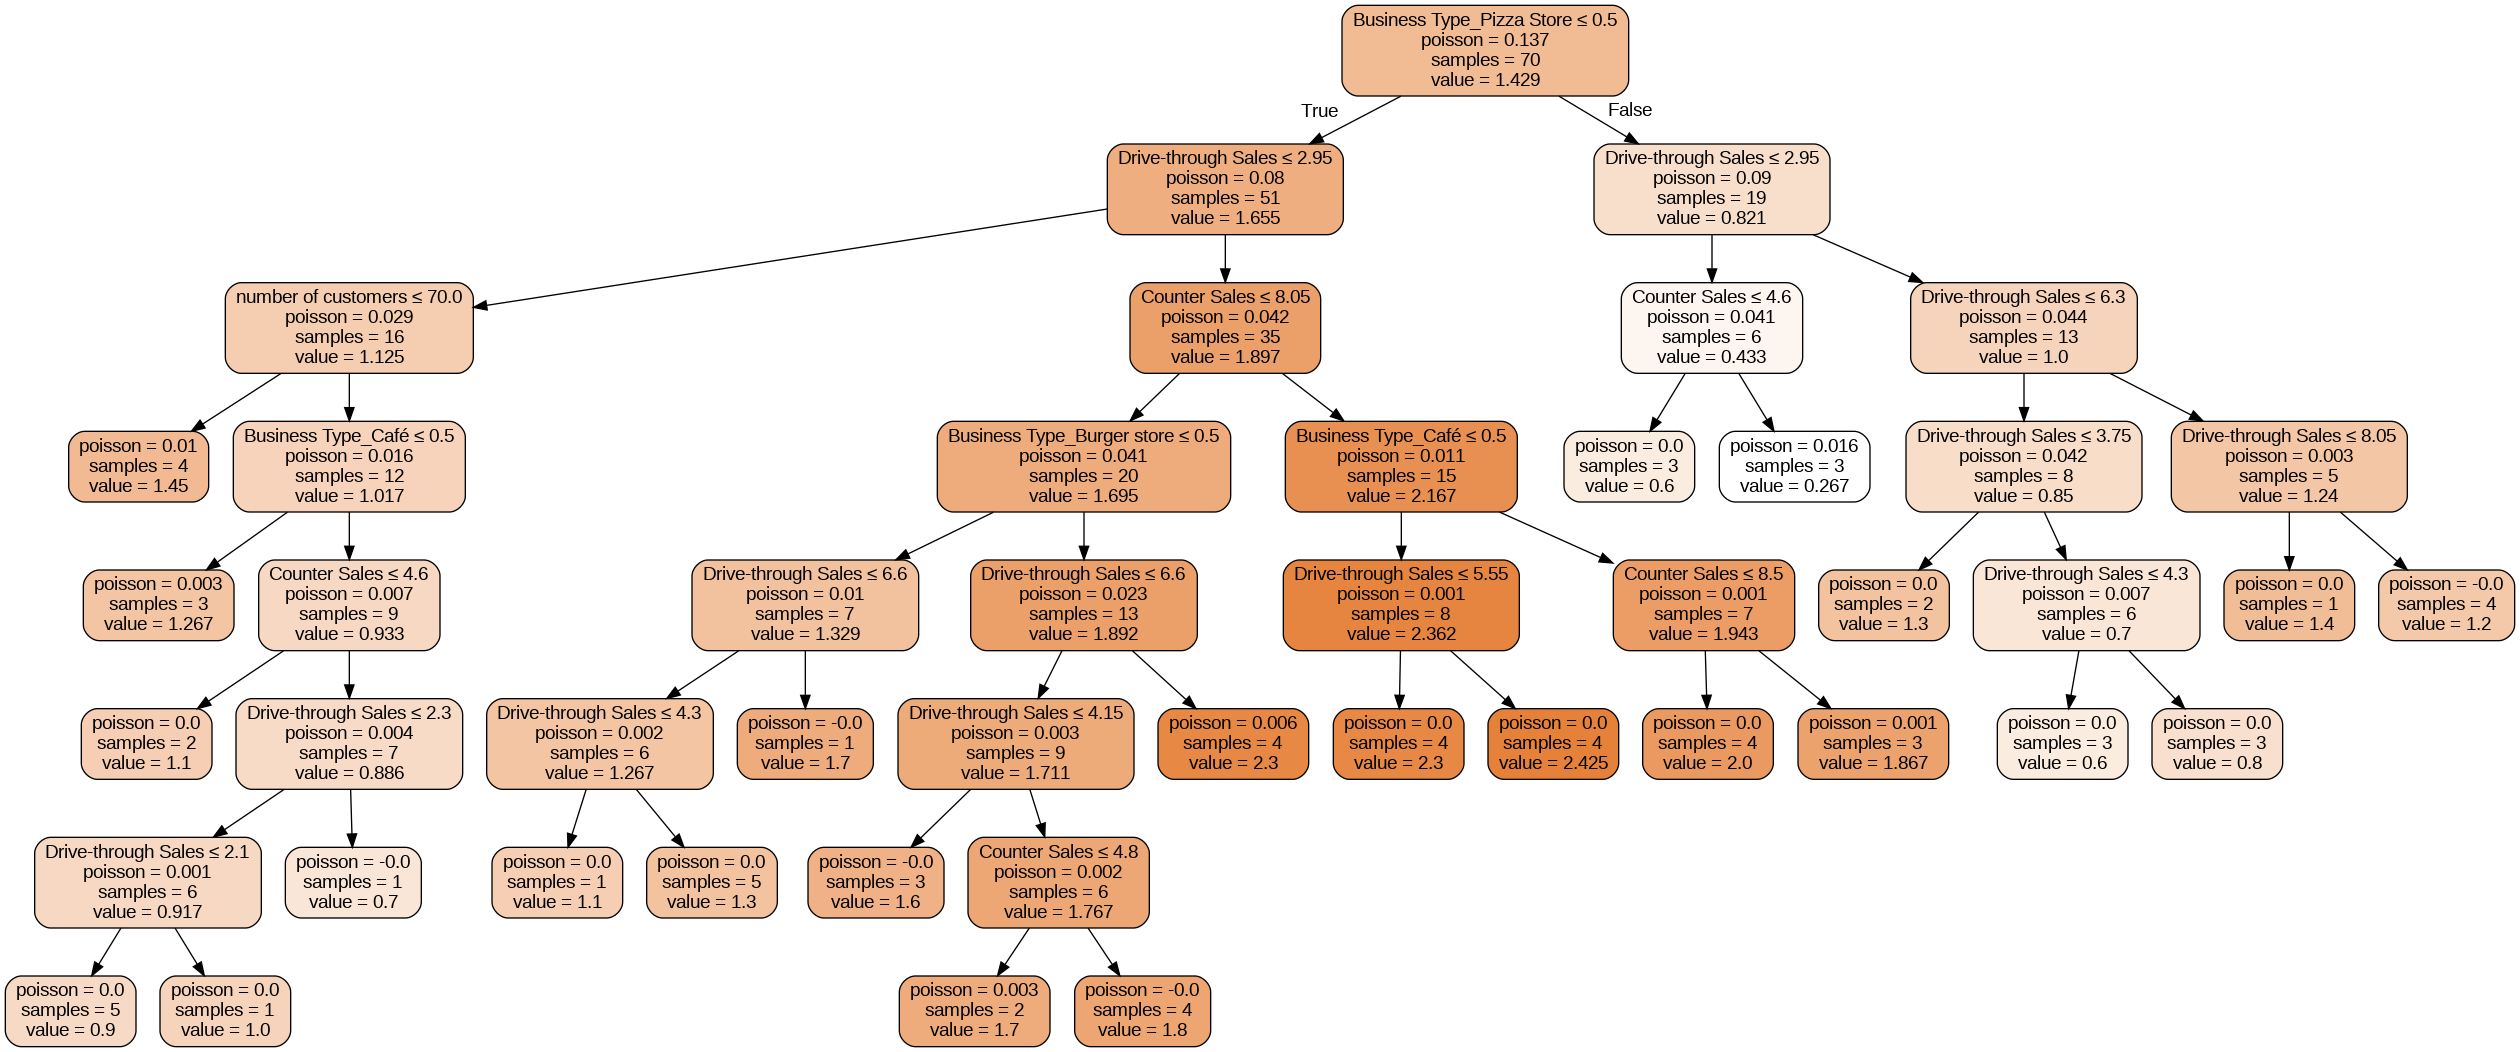

In [20]:
#Defining the best model from GridSearchCV to visualize the best Decision Tree
best_model = grid_search.best_estimator_
#Getting feature names to label on Decision Tree Visualization
feature_names = X_train.columns
#Exporting the best model to Graphviz format
dot_data = export_graphviz(best_model, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=feature_names)
#Visualizing the Decision Tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
#Displaying the Decision Tree
display(Image(filename="decision_tree.png"))

**(B) Impact of Descriptive Features as a Root Node**

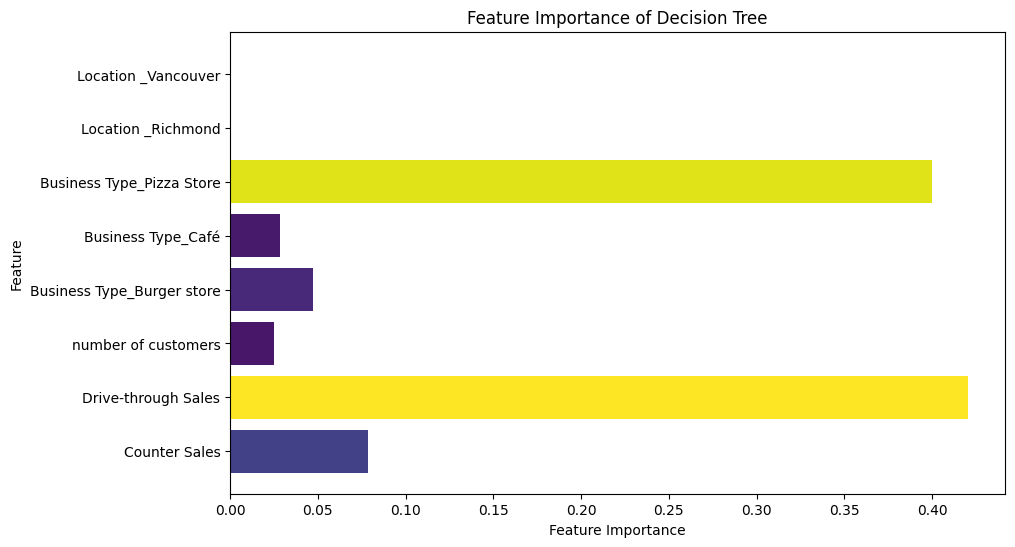

In [21]:
#Taking best Decision Tree as reference, evaluating the importance of each feature in fabrication of Decision Tree
feature_importances = best_model.feature_importances_
#Getting feature names to label on bar graph
feature_names = X_train.columns
#Defining colors feature for making visualization appealing and more informative
colors = plt.cm.viridis(feature_importances / max(feature_importances))
#Creating a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Decision Tree')
plt.show()

**(C) Development of Random Forest (RF) Prediction Model**

In [22]:
#Defining the Descriptive and Target Features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
#Splitting the Dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
#Implementing the Random Forest Model on Training Data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
#Evaluating Preliminary Model Performance (I will do tuning in next step to get best model)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Initial Mean Squared Error:", mse)
print("Initial R-squared:", r2)

Initial Mean Squared Error: 0.014140799999999919
Initial R-squared: 0.9531226932852042


**(D) Rationalizing Selected Structure: Hyperparameter Tuning of Random Forest Model**

In [23]:
#Defining a search space for hyperparameters to tune
param_dist = {
    'n_estimators': randint(100, 500),    #Randomly sample between 100 and 500 trees
    'max_depth': [None] + list(range(5, 21, 5)),   #Randomly sample between no maximum depth and depths from 5 to 20 in steps of 5
    'min_samples_split': randint(2, 11),   #Randomly sample between 2 and 10 samples for splitting a node
    'min_samples_leaf': randint(1, 5),   #Randomly sample between 1 and 4 samples for each leaf node
    'max_features': ['auto', 'sqrt', 'log2']   #Number of features to consider when looking for the best split
}
#Performing Randomized Search to decrease the code execution time
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,    # Limit the number of parameter settings to sample
                                   cv=5,
                                   scoring=['neg_mean_squared_error', 'r2'],
                                   refit='r2',
                                   n_jobs=-1)
#Fitting the Randomized Search on Training Data
random_search.fit(X_train, y_train)
#Searching Best values of hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
#Retraining the Model with Optimized Hyperparameters
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)
#Evaluating the performance of retrained model
y_pred_retrained = best_rf_model.predict(X_test)
mse_retrained = mean_squared_error(y_test, y_pred_retrained)
r2_retrained = r2_score(y_test, y_pred_retrained)
print("Retrained Mean Squared Error:", mse_retrained)
print("Retrained R-squared:", r2_retrained)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 393}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Retrained Mean Squared Error: 0.015867948685385918
Retrained R-squared: 0.9473971276406228


**(E) Visualizing and Interpreting the impact of descriptive features**

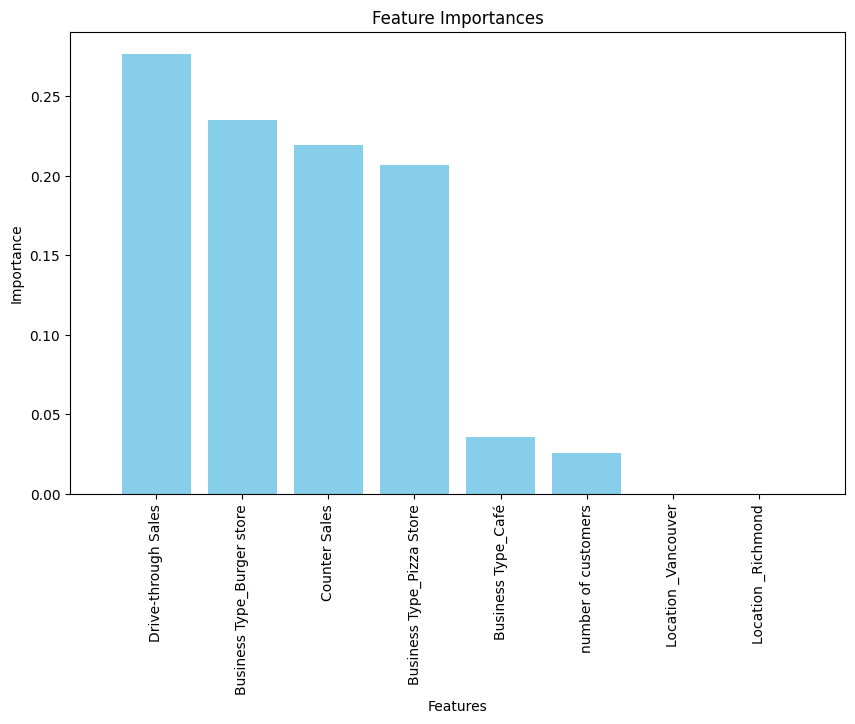

In [24]:
#Taking best Random Forest as reference, evaluating the importance of each feature in fabrication of Random Forest
feature_importances = best_rf_model.feature_importances_
#Getting feature names to label on bar graph
feature_names = X_train.columns
#Sorting feature importances in descending order
indices = feature_importances.argsort()[::-1]
#Creating a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

**Simulating Model Parameters**

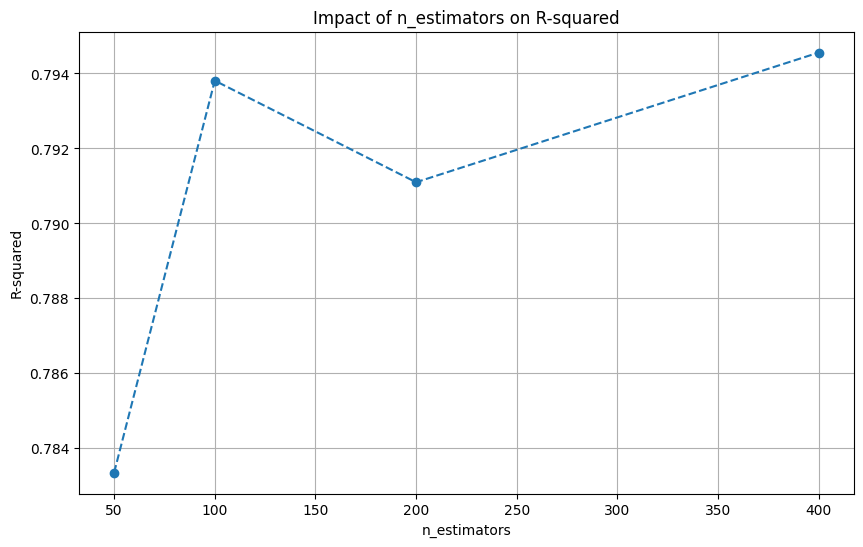

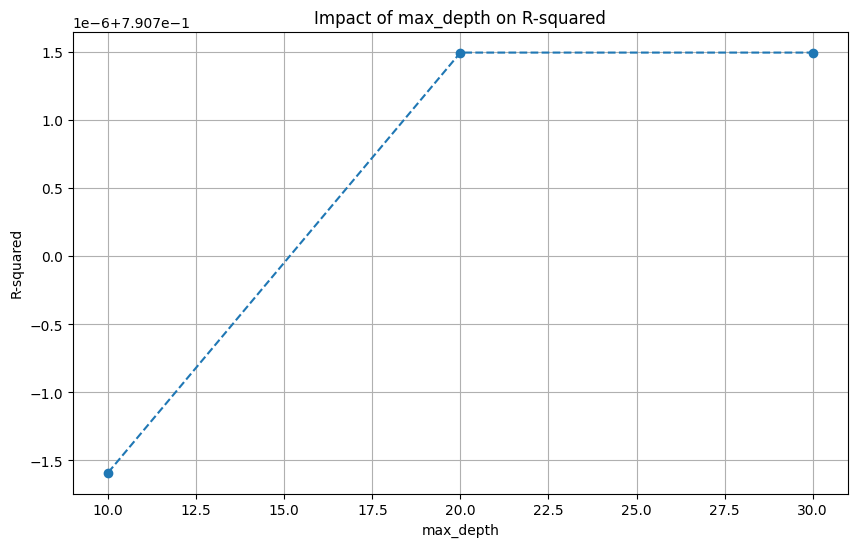

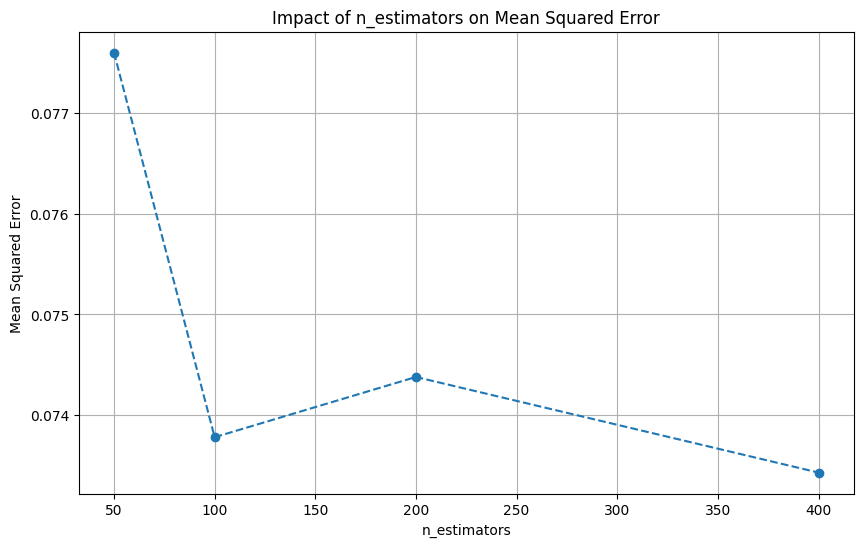

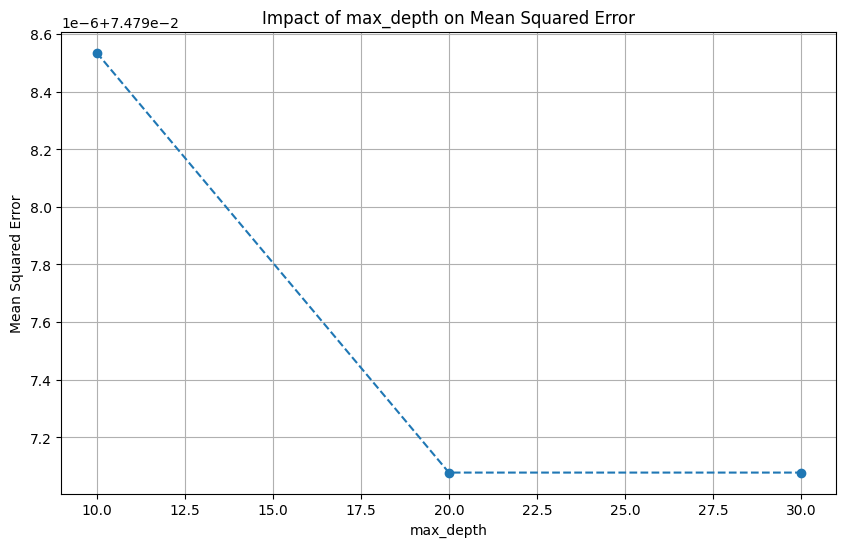

In [31]:
#Defining a smaller grid of parameters (n_estimators, max_depth) to be visualized
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30],
}
#Converting the parameter grid to a list of dictionaries
grid = list(ParameterGrid(param_grid))
#Lists to store results
r2_scores = []
mse_scores = []
params_list = []
#Looping through each combination of parameters
for params in grid:
    #Initializing the model with current parameters
    model = RandomForestRegressor(random_state=42, **params)
    #Performing cross-validation
    cv_r2 = cross_val_score(model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
    cv_mse = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(mean_squared_error), n_jobs=-1)
    #Storing the mean of the cross-validation results
    r2_scores.append(np.mean(cv_r2))
    mse_scores.append(np.mean(cv_mse))
    params_list.append(params)
#Converting results to numpy arrays for easier indexing
r2_scores = np.array(r2_scores)
mse_scores = np.array(mse_scores)
#Function to plot the impact of a single parameter
def plot_param_impact(param_name, param_values, scores, score_name):
    mean_scores = []
    for value in param_values:
        indices = [i for i, params in enumerate(params_list) if params[param_name] == value]
        mean_scores.append(np.mean(scores[indices]))

    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_scores, marker='o', linestyle='--')
    plt.xlabel(param_name)
    plt.ylabel(score_name)
    plt.title(f'Impact of {param_name} on {score_name}')
    plt.grid(True)
    plt.show()
#Impact of n_estimators on R-squared
plot_param_impact('n_estimators', param_grid['n_estimators'], r2_scores, 'R-squared')
#Impact of max_depth on R-squared
plot_param_impact('max_depth', param_grid['max_depth'], r2_scores, 'R-squared')
#Impact of n_estimators on Mean Squared Error
plot_param_impact('n_estimators', param_grid['n_estimators'], mse_scores, 'Mean Squared Error')
#Impact of max_depth on Mean Squared Error
plot_param_impact('max_depth', param_grid['max_depth'], mse_scores, 'Mean Squared Error')


**Correlation Matrix to see impact of descriptive features on target feature**

                            Net Profit
Counter Sales                 0.547624
Drive-through Sales           0.567075
number of customers          -0.021951
Business Type_Burger store    0.621972
Business Type_Café           -0.111676
Business Type_Pizza Store    -0.558700
Location _Richmond           -0.017731
Location _Vancouver           0.017731


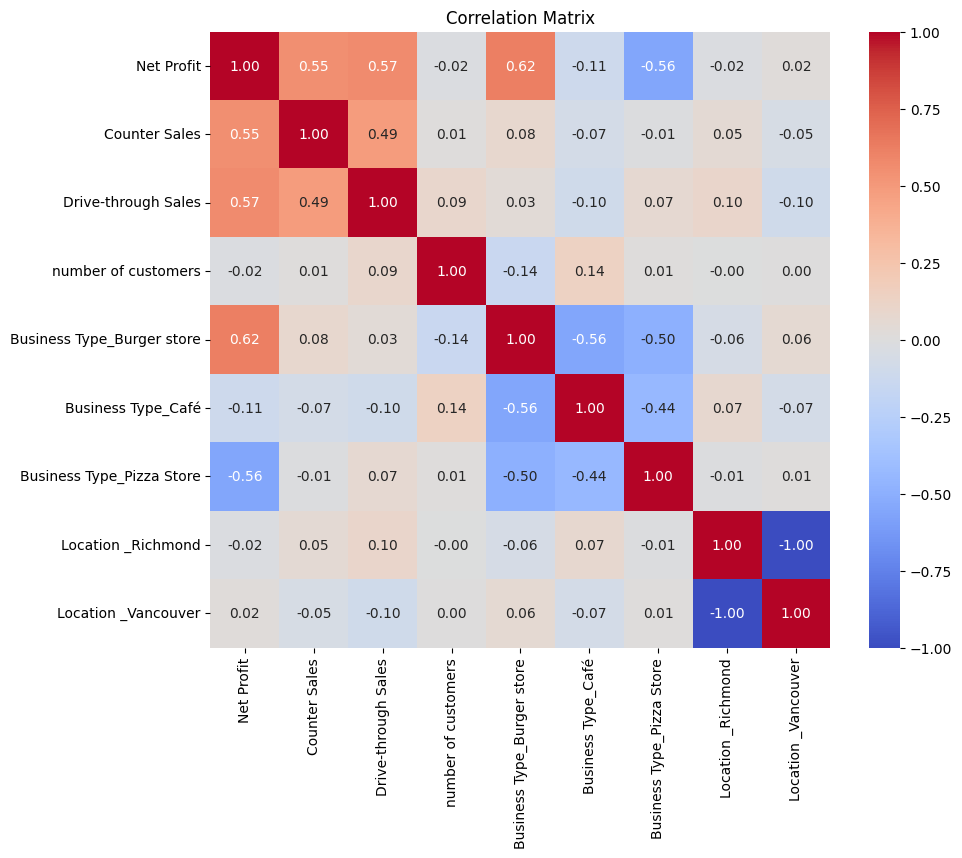

In [32]:
#Calculating the correlation matrix
correlation_matrix = df.corr()
#Extracting correlations with the target feature
target_correlation = correlation_matrix[['Net Profit']].drop('Net Profit')
#Printing the correlation values
print(target_correlation)
#Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**(F) Net Profit Forecasting using Decision Tree(DT) and Random Forest(RF) Model**

In [26]:
#Preparing input data for prediction
input_data = pd.DataFrame({
    "Counter Sales": [0.5],
    "Drive-through Sales": [0.7],
    "number of customers": [100],  #Mean of number of customers (calculated above) is 99.76
    "Business Type_Burger store": [0],
    "Business Type_Café": [0],
    "Business Type_Pizza Store": [1],
    "Location _Richmond": [1],
    "Location _Vancouver": [0]
})
#Predicting net profit using the trained DT model
profit_prediction_dt = best_model.predict(input_data)
print("Forecasted Net Profit using DT model:", profit_prediction_dt[0])
#Predicting net profit using the trained RF model
profit_prediction_rf = best_rf_model.predict(input_data)
print("Forecasted Net Profit using RF model:", profit_prediction_rf[0])

Forecasted Net Profit using DT model: 0.6
Forecasted Net Profit using RF model: 0.38067450220121923
